## Observations and Insights 

In [ ]:
#1. Capomulin and Ramicane are promising drug candidates for cancer treatment. They significantly lower tumor volumes in
#mouse models of cancer compared to placebo.

#2. Treatment with active compounds like Capomulin and Ramicane lower tumor volume proportional to treatment time. 
#The median tumor volume at the last time point is clearly lower than the median tumor volume over all time points.
#This is not the case for inactive compounds, like Infubinol and Ceftamine. Median tumor volume at the last time point 
#is clearly higher than median tumor volume over all timepoints, showing that tumors continue to grow when exposed to 
#Infubinol or Ceftamine.

#3. There is a clear positive correlation between average tumor volume and mouse body weight in Capumolin treated animals.
#This could mean that bigger animals need higher doses of this drug to miantain the same drug concentration in the
#body. It could also indicate that tumors grow faster in larger animals. Comparing animal weight and average tumor
#volume in placebo treated animals could provide insight in this question.


In [214]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



# Combine the data into a single dataset

merged_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview


In [121]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [215]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [228]:
merged_data.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [439]:
#Count number of rows in merged data frame

merged_data.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [440]:
# Checking the number of mice.

merged_data['Mouse ID'].nunique()

249

In [219]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

Dups = merged_data.duplicated(subset=['Mouse ID','Timepoint'], keep=False)

In [220]:
# Optional: Get all the data for the duplicate mouse ID. 

#Showing duplicates of mouse ID and timepoint.

IDTimeDups = merged_data[merged_data.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
IDTimeDups


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [221]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#Checking the number of rows in the clean DataFrame.

NoDups = merged_data.drop(index=909)

NoDups.count()

Mouse ID              1892
Drug Regimen          1892
Sex                   1892
Age_months            1892
Weight (g)            1892
Timepoint             1892
Tumor Volume (mm3)    1892
Metastatic Sites      1892
dtype: int64

In [222]:
# Checking the number of mice in the clean DataFrame.

NoDups['Mouse ID'].nunique()

249

## Summary Statistics

In [223]:
# Generate a summary statistics table of mean, median, variance, 
#standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

RegimenGroups = NoDups.groupby(['Drug Regimen'])


TumorVolMean = RegimenGroups['Tumor Volume (mm3)'].mean()
TumorVolMedian = RegimenGroups['Tumor Volume (mm3)'].median()
TumorVolVar = RegimenGroups['Tumor Volume (mm3)'].var()
TumorVolStdev = RegimenGroups['Tumor Volume (mm3)'].std()
TumorVolSem = RegimenGroups['Tumor Volume (mm3)'].sem()

TumorVolStats = pd.DataFrame({'Mean Tumor Volume': TumorVolMean, 'Median Tumor Volume': TumorVolMedian, 
                             'Tumor Volume Variance': TumorVolVar, 'Tumor Volume Std': TumorVolStdev, 
                              'Tumor Volume SEM': TumorVolSem})

TumorVolStats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [131]:
# Generate a summary statistics table of mean, median, variance, 
#standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

TumorVolStats2 = NoDups.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})



TumorVolStats2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.368318  50.909965  42.278090  6.502160  0.514041
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

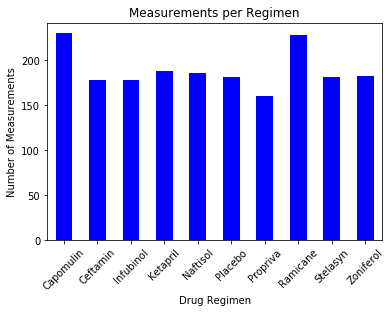

In [224]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

RegimenNumber = RegimenGroups['Mouse ID'].count()

RegimenPlot = RegimenGroups['Mouse ID'].count().plot(kind='bar', rot=45, color='blue')

RegimenPlot.set(xlabel='Drug Regimen', ylabel='Number of Measurements', title='Measurements per Regimen')

RegimenPlot



<BarContainer object of 10 artists>

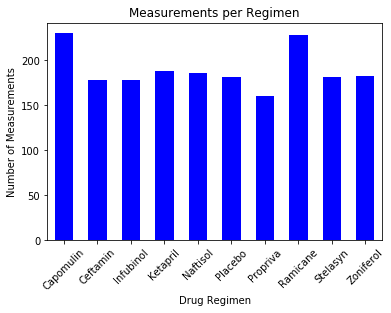

In [225]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

x_axis = TumorVolStats2.index

plt.title('Measurements per Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')
plt.xticks(rotation=45)
plt.xlim(-0.5, len(x_axis)-0.5)


plt.bar(x_axis, RegimenNumber, color='b', width=0.55)


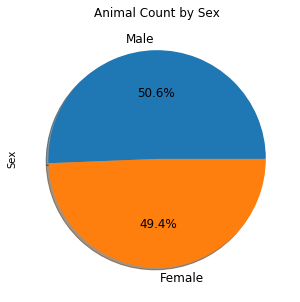

In [226]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

SexNumbers = NoDups['Sex'].value_counts()


SexNumbersPlot = SexNumbers.plot(kind='pie', figsize=(5,5), autopct='%1.1f%%', shadow=True, 
                                 title='Animal Count by Sex', fontsize=12)

SexNumbersPlot

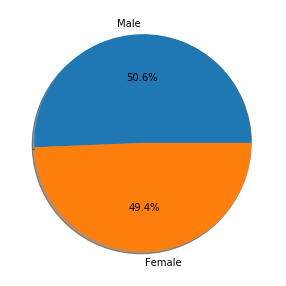

In [227]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.figure(figsize=(5,5))


SexNumbersPlot2 = plt.pie(SexNumbers, labels=SexNumbers.index, autopct="%1.1f%%", shadow=True, startangle=0)

plt.show()

## Quartiles, Outliers and Boxplots

In [238]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  


# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

MouseGroups = NoDups.groupby(['Mouse ID'])

LastTimeVol = MouseGroups['Tumor Volume (mm3)'].tail(1)


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

NoDups['Final Tumor Volume'] = LastTimeVol

NoDups

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Final Tumor Volume
0,k403,Ramicane,Male,21,16,0,45.000000,0,NaN
1,k403,Ramicane,Male,21,16,5,38.825898,0,NaN
2,k403,Ramicane,Male,21,16,10,35.014271,1,NaN
3,k403,Ramicane,Male,21,16,15,34.223992,1,NaN
4,k403,Ramicane,Male,21,16,20,32.997729,1,NaN
5,k403,Ramicane,Male,21,16,25,33.464577,1,NaN
6,k403,Ramicane,Male,21,16,30,31.099498,1,NaN
7,k403,Ramicane,Male,21,16,35,26.546993,1,NaN
8,k403,Ramicane,Male,21,16,40,24.365505,1,NaN
9,k403,Ramicane,Male,21,16,45,22.050126,1,22.050126


In [255]:
list(LastTimeVol)

[22.05012627,
 23.34359787,
 28.48403281,
 28.43096411,
 29.12847181,
 30.27623175,
 30.48598484,
 30.56462509,
 30.63869575,
 31.56046955,
 31.02392294,
 31.09533505,
 31.896238399999998,
 32.37735684,
 33.32909778,
 33.39765251,
 34.45529799,
 32.97852192,
 33.56240217,
 36.13485243,
 37.31184577,
 38.81036633,
 36.04104736,
 37.22565033,
 37.07402422,
 36.37451039,
 36.56165229,
 37.31123552,
 38.84687569,
 38.34200823,
 38.93963263,
 38.98287774,
 38.75326548,
 38.407618299999996,
 38.125164399999996,
 39.95234669,
 40.65812366,
 40.1592203,
 40.72857787,
 41.48300765,
 41.58152074,
 40.65900627,
 40.66771292,
 45.22086888,
 43.04754260000001,
 47.68596303,
 43.41938077,
 43.16637266,
 44.18345092,
 67.97341878,
 65.52574285,
 70.71762058,
 62.99935619,
 63.44068627,
 66.79415599,
 49.78341894,
 60.12201052,
 57.03186187,
 66.08306589,
 62.19141437,
 60.41370908,
 74.99776443,
 72.25596306,
 62.76509317,
 55.74514628,
 45.0,
 56.05774909,
 73.05136339,
 55.74282869,
 72.55523894,
 

In [358]:


#Get Capomulin stats

# Extract final tumor volumes for Capomulin treated animals

CapomulinFinalVol = pd.Series((np.where(NoDups['Drug Regimen']== 'Capomulin', 
                                   NoDups['Final Tumor Volume'], 'NaN')).astype(np.float)).dropna()


# Calculate quartiles, upper and lower bounds for Capomulin

Capoquartiles = CapomulinFinalVol.quantile([.25,.5,.75])
Capolowerq = Capoquartiles[0.25]
Capoupperq = Capoquartiles[.75]
Capoiqr = Capoupperq-Capolowerq
    

CapoLowerBound = Capolowerq - (1.5*Capoiqr)
CapoUpperBound = Capoupperq + (1.5*Capoiqr)   

# Determine outliers using upper and lower bounds

Capooutliers = [x for x in CapomulinFinalVol if x > CapoUpperBound or x < CapoLowerBound]


print(f"The lower quartile of tumor weight after Capomulin treatment is: {Capolowerq}")
print(f"The upper quartile of tumor weight after Capomulin treatment is: {Capoupperq}")
print(f"The interquartile range tumor weight after Capomulin treatment is: {Capoiqr}")
print(f"The the median tumor weight after Capomulin treatment is: {Capoquartiles[0.5]} ")
print(f"Outliers in tumor weight after Capomulin treatment are: {Capooutliers} ")


The lower quartile of tumor weight after Capomulin treatment is: 32.37735684
The upper quartile of tumor weight after Capomulin treatment is: 40.1592203
The interquartile range tumor weight after Capomulin treatment is: 7.781863460000004
The the median tumor weight after Capomulin treatment is: 38.125164399999996 
Outliers in tumor weight after Capomulin treatment are: [] 


In [359]:
#Get Ramicane stats

# Extract final tumor volumes for Ramicane treated animals

RamicaneFinalVol = pd.Series((np.where(NoDups['Drug Regimen']== 'Ramicane', 
                                   NoDups['Final Tumor Volume'], 'NaN')).astype(np.float)).dropna()


# Calculate quartiles, upper and lower bounds for Ramicane

Ramiquartiles = RamicaneFinalVol.quantile([.25,.5,.75])
Ramilowerq = Ramiquartiles[0.25]
Ramiupperq = Ramiquartiles[.75]
Ramiiqr = Ramiupperq-Ramilowerq
    

RamiLowerBound = Ramilowerq - (1.5*Ramiiqr)
RamiUpperBound = Ramiupperq + (1.5*Ramiiqr) 


# Determine outliers using upper and lower bounds

Ramioutliers = [x for x in RamicaneFinalVol if x > RamiUpperBound or x < RamiLowerBound]

print(f"The lower quartile of tumor weight after Ramicane treatment is: {Ramilowerq}")
print(f"The upper quartile of tumor weight after Ramicane treatment is: {Ramiupperq}")
print(f"The interquartile range tumor weight after Ramicane treatment is: {Ramiiqr}")
print(f"The the median tumor weight after Ramicane treatment is: {Ramiquartiles[0.5]} ")
print(f"Outliers in tumor weight after Ramicane treatment are: {Ramioutliers} ")

The lower quartile of tumor weight after Ramicane treatment is: 31.56046955
The upper quartile of tumor weight after Ramicane treatment is: 40.65900627
The interquartile range tumor weight after Ramicane treatment is: 9.098536719999998
The the median tumor weight after Ramicane treatment is: 36.56165229 
Outliers in tumor weight after Ramicane treatment are: [] 


In [363]:
#Get Infubinol stats

# Extract final tumor volumes for Infubinol treated animals


InfubinolFinalVol = pd.Series((np.where(NoDups['Drug Regimen']== 'Infubinol', 
                                   NoDups['Final Tumor Volume'], 'NaN')).astype(np.float)).dropna()


# Calculate quartiles, upper and lower bounds for Infubinol

Infuquartiles = InfubinolFinalVol.quantile([.25,.5,.75])
Infulowerq = Infuquartiles[0.25]
Infuupperq = Infuquartiles[.75]
Infuiqr = Infuupperq-Infulowerq
    

InfuLowerBound = Infulowerq - (1.5*Infuiqr)
InfuUpperBound = Infuupperq + (1.5*Infuiqr) 


# Determine outliers using upper and lower bounds

Infuoutliers = [x for x in InfubinolFinalVol if x > InfuUpperBound or x < InfuLowerBound]

print(f"The lower quartile of tumor weight after Infubinol treatment is: {Infulowerq}")
print(f"The upper quartile of tumor weight after Infubinol treatment is: {Infuupperq}")
print(f"The interquartile range tumor weight after Infubinol treatment is: {Infuiqr}")
print(f"The the median tumor weight after Infubinol treatment is: {Infuquartiles[0.5]} ")
print(f"Outliers in tumor weight after Infubinol treatment are: {Infuoutliers} ")


The lower quartile of tumor weight after Infubinol treatment is: 54.04860769
The upper quartile of tumor weight after Infubinol treatment is: 65.52574285
The interquartile range tumor weight after Infubinol treatment is: 11.477135160000003
The the median tumor weight after Infubinol treatment is: 60.16518046 
Outliers in tumor weight after Infubinol treatment are: [36.321345799999996] 


In [361]:
#Get Ceftamine stats

# Extract final tumor volumes for Ceftamine treated animals

CeftaminFinalVol = pd.Series((np.where(NoDups['Drug Regimen']== 'Ceftamin', 
                                   NoDups['Final Tumor Volume'], 'NaN')).astype(np.float)).dropna()

# Calculate quartiles, upper and lower bounds for Ceftamin

Ceftaquartiles = CeftaminFinalVol.quantile([.25,.5,.75])
Ceftalowerq = Ceftaquartiles[0.25]
Ceftaupperq = Ceftaquartiles[.75]
Ceftaiqr = Ceftaupperq-Ceftalowerq
    

CeftaLowerBound = Ceftalowerq - (1.5*Ceftaiqr)
CeftaUpperBound = Ceftaupperq + (1.5*Ceftaiqr) 


# Determine outliers using upper and lower bounds

Ceftaoutliers = [x for x in CeftaminFinalVol if x > CeftaUpperBound or x < CeftaLowerBound]

print(f"The lower quartile of tumor weight after Ceftamin treatment is: {Ceftalowerq}")
print(f"The upper quartile of tumor weight after Ceftamin treatment is: {Ceftaupperq}")
print(f"The interquartile range tumor weight after Ceftamin treatment is: {Ceftaiqr}")
print(f"The the median tumor weight after Ceftamin treatment is: {Ceftaquartiles[0.5]} ")
print(f"Outliers in tumor weight after Ceftamin treatment are: {Ceftaoutliers} ")


The lower quartile of tumor weight after Ceftamin treatment is: 48.72207785
The upper quartile of tumor weight after Ceftamin treatment is: 64.29983003
The interquartile range tumor weight after Ceftamin treatment is: 15.577752179999997
The the median tumor weight after Ceftamin treatment is: 59.85195552 
Outliers in tumor weight after Ceftamin treatment are: [] 


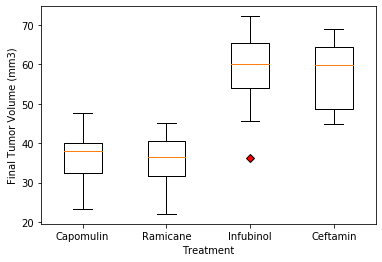

In [366]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


red_Diamond = dict(markerfacecolor='r', marker='D')
plt.xlabel('Treatment')
plt.ylabel('Final Tumor Volume (mm3)')
plt.boxplot([CapomulinFinalVol, RamicaneFinalVol, InfubinolFinalVol, CeftaminFinalVol], flierprops=red_Diamond)
plt.xticks([1,2,3,4],['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])


plt.show()


## Line and Scatter Plots

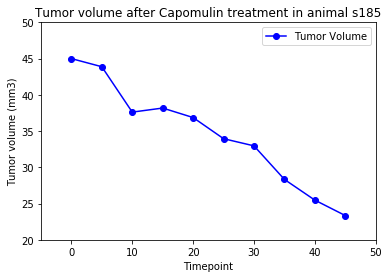

In [386]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


s185data = NoDups.loc[NoDups['Mouse ID'] == 's185']

x_axis = s185data['Timepoint']
y_axis = s185data['Tumor Volume (mm3)']
plt.xlim([-5,50])
plt.ylim([20,50])
plt.xlabel('Timepoint')
plt.ylabel('Tumor volume (mm3)')
plt.title('Tumor volume after Capomulin treatment in animal s185')
vol = plt.plot(x_axis, y_axis, marker ='o', color='blue', label='Tumor Volume')
plt.legend(loc='upper right')
plt.show()

In [397]:
NoDups

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Final Tumor Volume
0,k403,Ramicane,Male,21,16,0,45.000000,0,NaN
1,k403,Ramicane,Male,21,16,5,38.825898,0,NaN
2,k403,Ramicane,Male,21,16,10,35.014271,1,NaN
3,k403,Ramicane,Male,21,16,15,34.223992,1,NaN
4,k403,Ramicane,Male,21,16,20,32.997729,1,NaN
5,k403,Ramicane,Male,21,16,25,33.464577,1,NaN
6,k403,Ramicane,Male,21,16,30,31.099498,1,NaN
7,k403,Ramicane,Male,21,16,35,26.546993,1,NaN
8,k403,Ramicane,Male,21,16,40,24.365505,1,NaN
9,k403,Ramicane,Male,21,16,45,22.050126,1,22.050126


In [414]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen




MouseDrug = MouseGroups['Drug Regimen'].first()

Weight = MouseGroups['Weight (g)'].mean()

MeanTumorVolume = MouseGroups['Tumor Volume (mm3)'].mean()







#Make dataframe of mouse ID with weight and mean tumor vol

MouseWeightVol = pd.DataFrame({'Drug Regimen': MouseDrug, 'Animal Weight': Weight, 'AVG Tumor Vol': MeanTumorVolume})

MouseWeightVol


,Drug Regimen,Animal Weight,AVG Tumor Vol
Mouse ID,,,
a203,Infubinol,23,56.312708
a251,Infubinol,25,55.237095
a262,Placebo,29,58.611631
a275,Ceftamin,28,52.770965
a366,Stelasyn,29,54.639906
a401,Zoniferol,25,54.000706
a411,Ramicane,22,40.701385
a444,Ramicane,25,43.060052
a457,Ketapril,30,47.415437


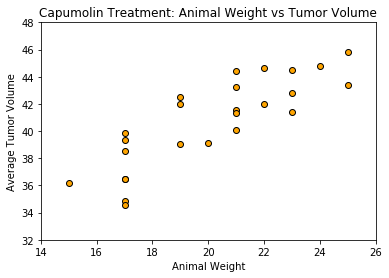

In [427]:
CapomulinWeights = pd.Series((np.where(MouseWeightVol['Drug Regimen']== 'Capomulin', 
                                   MouseWeightVol['Animal Weight'], 'NaN')).astype(np.float)).dropna()


CapomulinVol = pd.Series((np.where(MouseWeightVol['Drug Regimen']== 'Capomulin', 
                                   MouseWeightVol['AVG Tumor Vol'], 'NaN')).astype(np.float)).dropna()


plt.scatter(CapomulinWeights,CapomulinVol, facecolors='orange', edgecolors='black')

plt.xlabel('Animal Weight')
plt.ylabel('Average Tumor Volume')
plt.title('Capumolin Treatment: Animal Weight vs Tumor Volume')
plt.xlim([14,26])
plt.ylim([32,48])
plt.show()

## Correlation and Regression

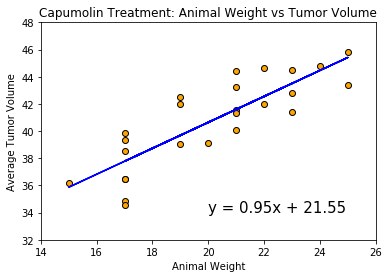

The correlation between animal weight and tumor volume after Capomulin treatment is 0.84


In [438]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(CapomulinWeights, CapomulinVol)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(CapomulinWeights, CapomulinVol)
regress_values = CapomulinWeights * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(CapomulinWeights,CapomulinVol, facecolors='orange', edgecolors='black')
plt.xlabel('Animal Weight')
plt.ylabel('Average Tumor Volume')
plt.title('Capumolin Treatment: Animal Weight vs Tumor Volume')
plt.xlim([14,26])
plt.ylim([32,48])
plt.plot(CapomulinWeights,regress_values,"b-")
plt.annotate(line_eq,(20,34),fontsize=15,color="black")

plt.show()
print(f"The correlation between animal weight and tumor volume after Capomulin treatment is {round(correlation[0],2)}")